In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import datetime
import time
import swifter
import math

# Data Loading

In [2]:
data = pd.read_csv('combined_data_1.csv')

In [3]:
data.head()

,UserId,State,Country,Device,OS,DateTime,Event
0,0000146e97c32d369268e5ba5f4b907c,36,1,1,1,2017-02-21 10:36:36,App Launched
1,0000146e97c32d369268e5ba5f4b907c,36,1,1,1,2017-02-21 10:36:36,Registration
2,0000146e97c32d369268e5ba5f4b907c,36,1,1,1,2017-02-21 12:16:20,App Launched
3,0000146e97c32d369268e5ba5f4b907c,36,1,1,1,2017-02-21 18:16:28,App Launched
4,0000146e97c32d369268e5ba5f4b907c,36,1,1,1,2017-02-21 18:16:28,UTM Visited


In [4]:
data.shape

(3868206, 7)

In [6]:
VideoStarted = pd.read_csv('./data_modded/VideoStartedMod.csv',sep=',')
VideoStarted['Event'] = "Video Started"

,UserId,State,Genre,Category,ProgramType,Country,Device,OS,VideoId,DateTime,Event
0,0280dfdd112732a3ac12b12dc770b7af,35,Romance,vod,Movies,1,1,2,36a27b379622f342ec87f9aafadb8f94,2017-01-06 00:00:08,Video Started
1,435d41ae019cb8db785483793859c9a8,35,Anime,vod,TV Shows,1,1,1,a4d9b88c7ed63d723c70b358a857719c,2017-01-06 00:00:28,Video Started
2,1faf0ce0b98e02e1568702f516f01a78,35,Drama,vod,TV Shows,1,1,1,806660cb47633263a24bbc53238a9a53,2017-01-06 00:00:36,Video Started
3,3ec691b9d2b5d53ef965fe59b1900b30,35,Drama,vod,TV Shows,1,2,2,385114825a85d6878e7a0978f9ba5546,2017-01-06 00:00:48,Video Started
4,ff230d487a7139b65f33b54a4cbd2d9e,35,Comedy,vod,Movies,1,1,1,368a480ec0ae105aee8320dd93483e39,2017-01-06 00:00:56,Video Started


In [8]:
VideoStarted = VideoStarted[['UserId','State','Country','Device','OS','DateTime','Event']]
VideoStarted.head()

,UserId,State,Country,Device,OS,DateTime,Event
0,0280dfdd112732a3ac12b12dc770b7af,35,1,1,2,2017-01-06 00:00:08,Video Started
1,435d41ae019cb8db785483793859c9a8,35,1,1,1,2017-01-06 00:00:28,Video Started
2,1faf0ce0b98e02e1568702f516f01a78,35,1,1,1,2017-01-06 00:00:36,Video Started
3,3ec691b9d2b5d53ef965fe59b1900b30,35,1,2,2,2017-01-06 00:00:48,Video Started
4,ff230d487a7139b65f33b54a4cbd2d9e,35,1,1,1,2017-01-06 00:00:56,Video Started


In [9]:
VideoDetails = pd.read_csv('./data_modded/VideoDetailsMod.csv',sep=',')
VideoDetails['Event'] = "Video Details"

In [10]:
VideoDetails = VideoDetails[['UserId','State','Country','Device','OS','DateTime','Event']]
VideoDetails.head()

,UserId,State,Country,Device,OS,DateTime,Event
0,dc93d200565e5bf6e6fc55adb1c5ba06,35,1,2,1,2017-01-06 00:00:04,Video Details
1,12060efd8b68ea562b265d0129a8af1f,35,1,1,1,2017-01-06 00:00:16,Video Details
2,9151ab2a901458f27e36548d4a8dc011,0,255,1,1,2017-01-06 00:00:20,Video Details
3,1faf0ce0b98e02e1568702f516f01a78,35,1,1,1,2017-01-06 00:00:20,Video Details
4,435d41ae019cb8db785483793859c9a8,35,1,1,1,2017-01-06 00:00:20,Video Details


In [11]:
data.shape

(3868206, 7)

In [12]:
VideoStarted.shape

(1796525, 7)

In [13]:
data = data.append(VideoStarted,ignore_index=True)
data.shape

(5664731, 7)

In [15]:
VideoDetails.shape

(3695451, 7)

In [14]:
data = data.append(VideoDetails,ignore_index=True)
data.shape

(9360182, 7)

In [18]:
data = data[['UserId','Event','DateTime']]

In [19]:
data.sort_values(['UserId','DateTime','Event'],axis=0,inplace=True)

,UserId,Event,DateTime
0,0000146e97c32d369268e5ba5f4b907c,App Launched,2017-02-21 10:36:36
1,0000146e97c32d369268e5ba5f4b907c,Registration,2017-02-21 10:36:36
2,0000146e97c32d369268e5ba5f4b907c,App Launched,2017-02-21 12:16:20
3,0000146e97c32d369268e5ba5f4b907c,App Launched,2017-02-21 18:16:28
4,0000146e97c32d369268e5ba5f4b907c,UTM Visited,2017-02-21 18:16:28


# Timeline of every activity of the user

In [21]:
data.head(15)

,UserId,Event,DateTime
0,0000146e97c32d369268e5ba5f4b907c,App Launched,2017-02-21 10:36:36
1,0000146e97c32d369268e5ba5f4b907c,Registration,2017-02-21 10:36:36
2,0000146e97c32d369268e5ba5f4b907c,App Launched,2017-02-21 12:16:20
3,0000146e97c32d369268e5ba5f4b907c,App Launched,2017-02-21 18:16:28
4,0000146e97c32d369268e5ba5f4b907c,UTM Visited,2017-02-21 18:16:28
5,0000146e97c32d369268e5ba5f4b907c,App Launched,2017-02-21 21:31:40
6,0000146e97c32d369268e5ba5f4b907c,App Launched,2017-02-22 17:36:48
7,0000146e97c32d369268e5ba5f4b907c,App Launched,2017-02-22 20:13:20
8,0000146e97c32d369268e5ba5f4b907c,App Launched,2017-02-23 11:44:24
6174927,0000146e97c32d369268e5ba5f4b907c,Video Details,2017-02-23 11:46:12


In [24]:
data['DateTime'] = data['DateTime'].swifter.apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [25]:
data['Month'] = data['DateTime'].swifter.apply(lambda x : x.month)

In [26]:
chart_data = pd.pivot_table(data,values='UserId',index='Month',columns='Event',aggfunc='count')

In [27]:
chart_data.head()

Event,App Launched,App Uninstalled,Registration,UTM Visited,Video Details,Video Started
Month,,,,,,
1,412029,66762,41094,98052,321307,121451
2,318173,49160,35123,60636,225945,101902
3,324575,43252,43240,67629,323375,142241
4,539782,62648,81397,100321,809816,424618
5,800423,74124,92048,116383,1463836,708876


Text(0, 0.5, 'Count of Occurence')

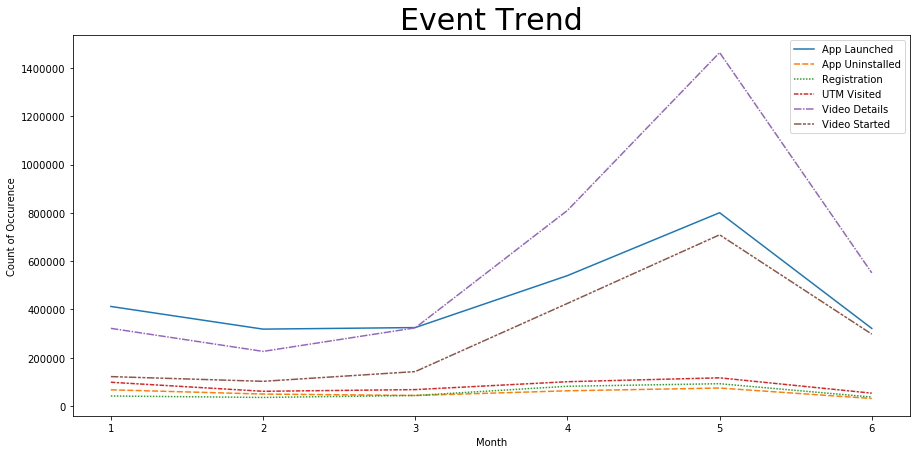

In [28]:
fig, ax = plt.subplots(figsize=(15,7))
sns.lineplot(data=chart_data)
ax.set_title('Event Trend', fontsize=30)
ax.set_ylabel('Count of Occurence')